# Creating Plots to discuss Image Quality
***
* Author: Yannick E. Heiser
* Email:  wfg813@alumni.ku.dk
* Last Updated:   1st July 2023
***

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['font.size'] = 16
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 12
from skimage import io
from tkinter import Tcl
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
from scipy.stats import lognorm
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure
from matplotlib.patches import Rectangle
from PIL import Image
Image.MAX_IMAGE_PIXELS = 2000000000

In [2]:
file_path = "/home/jovyan/work/PICE/ResearchGroups/Stratigraphy/Yannick 2022/Data_csv/grain_properties/"
bag_list = ["nmx3656c_1","nmx3668c_1"]
len_img = 12000 #12000 pixel = 6cm
step_size = 200 #200 pixel = 1mm
overlap = 2000 # length of overlap of cropped images 2000px=1cm
px_to_cm = 1/2000 #1px = 1/2000cm
interval_half = 10/10/2/px_to_cm #interval size: change first number to interval size in mm, 1000 pixel = 5mm

def read_csv(path,bags):
    """
    read in csv files with grain size data and put it in dict of dataframes
    --------------------------------------
    param: (str) path: path of csv files
    param: (array) bags: list of bag name strings
    return: (dict) df: dictionary with containing DFs of data
    """
    df = {}
    for i in range(len(bags)):
        bag = str(bags[i])
        print(bag)
        if path != None:
            os.chdir(path + bag)    
        files = glob.glob("*.csv")
        print("# files:",len(files))
        files = Tcl().call('lsort', '-dict', files) #sort csv files after name
        df[bag] = pd.DataFrame()
        for i in range(len(files)):
            file = files[i]
            new_df = pd.read_csv(file)
            new_col = np.ones(new_df.shape[0])*i
            new_col = new_col.astype(int)
            new_df["crop_image"] = new_col
            df[bag] = pd.concat([df[bag],new_df],ignore_index=True)
    os.chdir("/home/jovyan/work/Master Thesis")
    return df

In [3]:
df = read_csv(file_path,bag_list)
print("Shape of dataframes: ",df["nmx3668c_1"].shape)

nmx3656c_1
# files: 11
nmx3668c_1
# files: 11
Shape of dataframes:  (178059, 10)


In [4]:
df["nmx3668c_1"].head()

Unnamed: 0  area  equivalent_diameter   centroid_x  centroid_y  \
0           1   175             2.985411   826.285714    1.571429   
1           2    50             1.595769  2560.000000    1.500000   
2           3    25             1.128379  2719.000000    1.000000   
3           4    25             1.128379  2721.000000    1.000000   
4           5    50             1.595769  8299.000000    1.500000   

   orientation  major_axis_length  minor_axis_length  perimeter  crop_image  
0    81.650407           4.155375           1.905471   7.207107           0  
1     0.000000           2.000000           0.000000   0.000000           0  
2    45.000016           0.000000           0.000000   0.000000           0  
3    45.000016           0.000000           0.000000   0.000000           0  
4     0.000000           2.000000           0.000000   0.000000           0

In [5]:
# load images and print them

def find_threshold(path,bag,n,df,thresholds):
    """
    show cropped image with thresholded areas of one bag
    --------------------------------
    param: (str) path: file path
    param: (str) bag: bag name
    param: (int) n: number of cropped image in bag
    param: (dict) df: dictonary of dataframes with grain parameters
    param: (array) : list of thresholding values
    return: void
    """
    file = bag + "_{}.png".format(n)
    path_img = os.path.join(path,file)
    img = io.imread(path_img)
    print(img.shape)
    df_img = df[bag][df[bag].crop_image==n]
    df_img_cut = df_img[df_img.area>thresholds[0]]
    fig, ax = plt.subplots(1, 1,figsize=(16,9))
    ax.imshow(img)
    ax.plot(df_img_cut.centroid_x,df_img_cut.centroid_y,"o",color='white')
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    ax.hlines(y=500,xmin=200,xmax=2200,lw=12,color="white")
    ax.text(900,350,"1cm",color="white",size="xx-large",weight="extra bold")
    fig.tight_layout()
    fig.savefig("Plots/26_Image_Quality_{}".format(file))
    fig.show() 

(6090, 12000, 3)


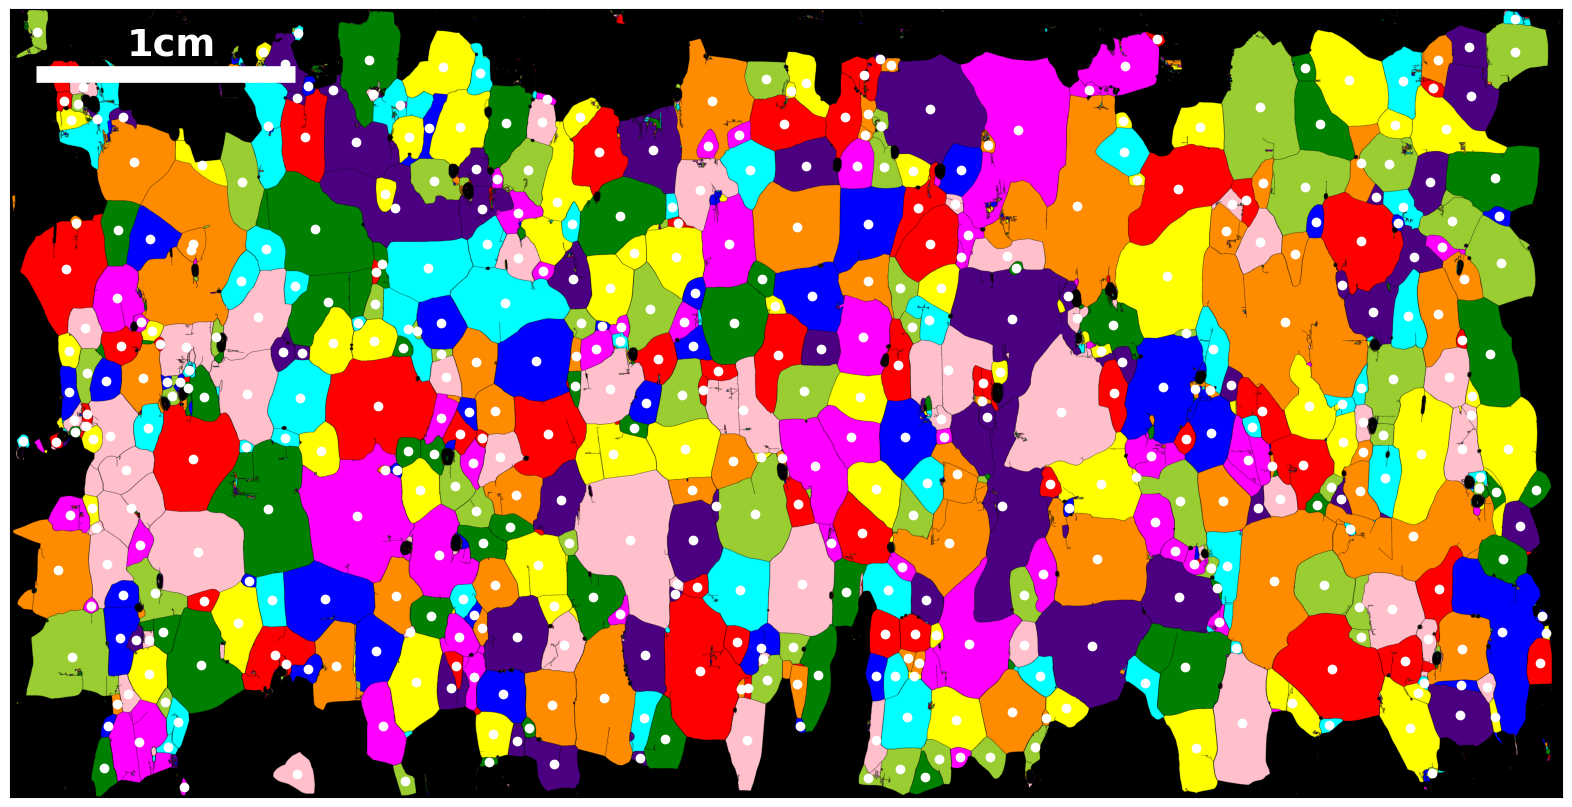

In [6]:
img_path = "Plots/NEEM_Labeled_and_Raw_Images/"
image_bag = "nmx3668c_1"
img_path = img_path + image_bag
thresholds = [100000]
find_threshold(img_path,image_bag,3,df,thresholds)

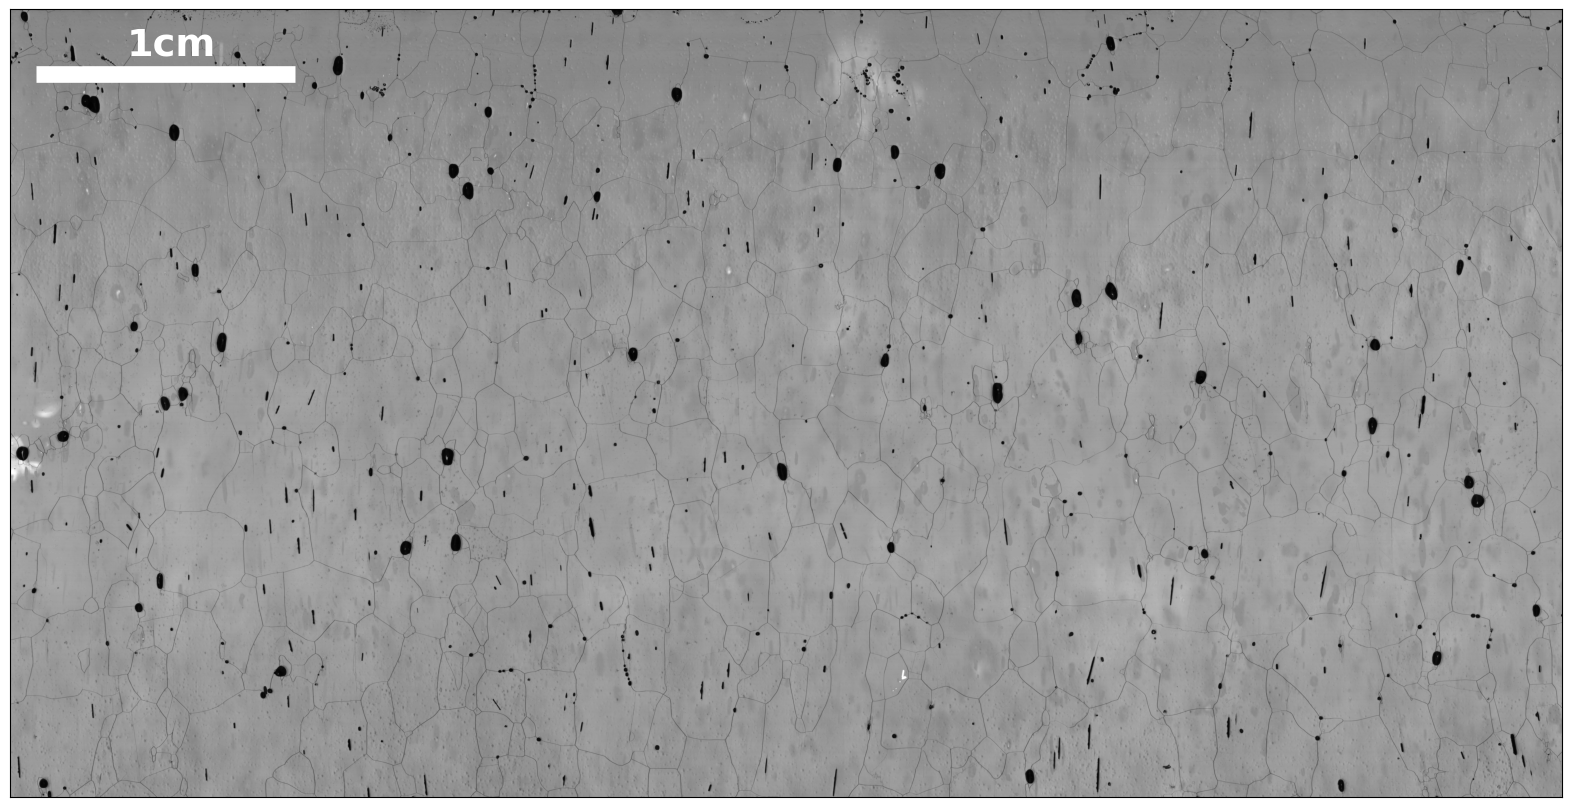

In [7]:
# raw figure
file = "nmx3668c_1_3_raw.png"
img = io.imread(os.path.join("Plots/NEEM_Labeled_and_Raw_Images/nmx3668c_1",file))

fig, ax = plt.subplots(1, 1,figsize=(16,9))
ax.imshow(img,cmap="gray")
ax.set_xticks([], [])
ax.set_yticks([], [])
ax.hlines(y=500,xmin=200,xmax=2200,lw=12,color="white")
ax.text(900,350,"1cm",color="white",size="xx-large",weight="extra bold")
fig.tight_layout()
fig.savefig("Plots/26_Image_Quality_{}".format(file))
fig.show()  

### Creat Plot for Discussion of Sublimation

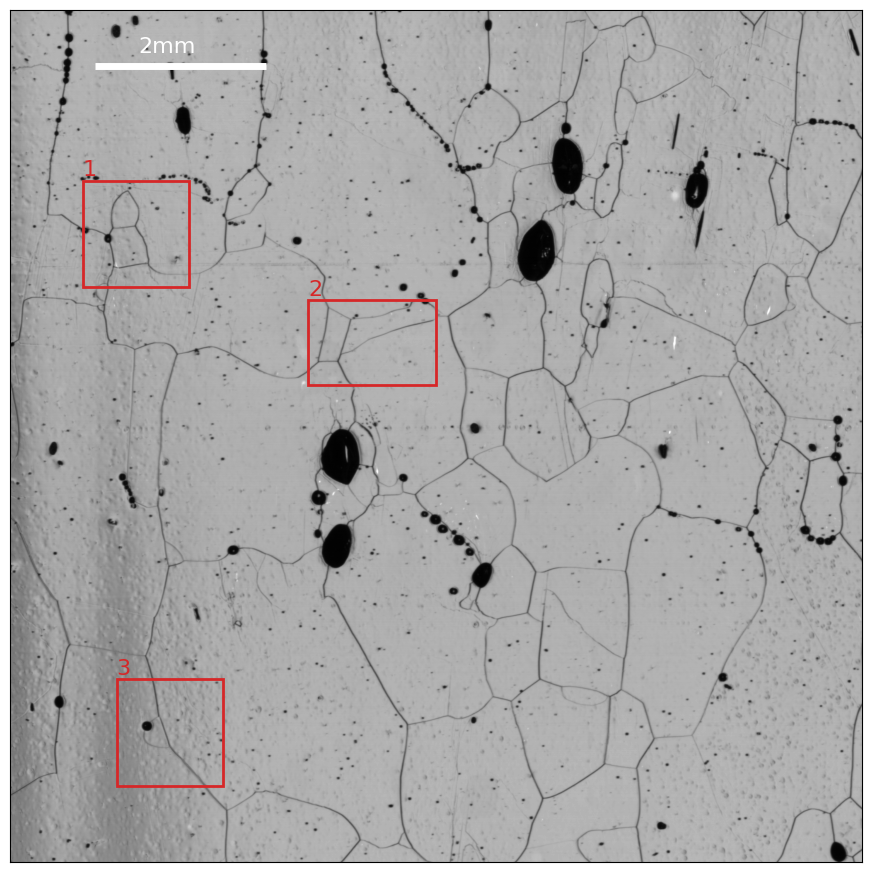

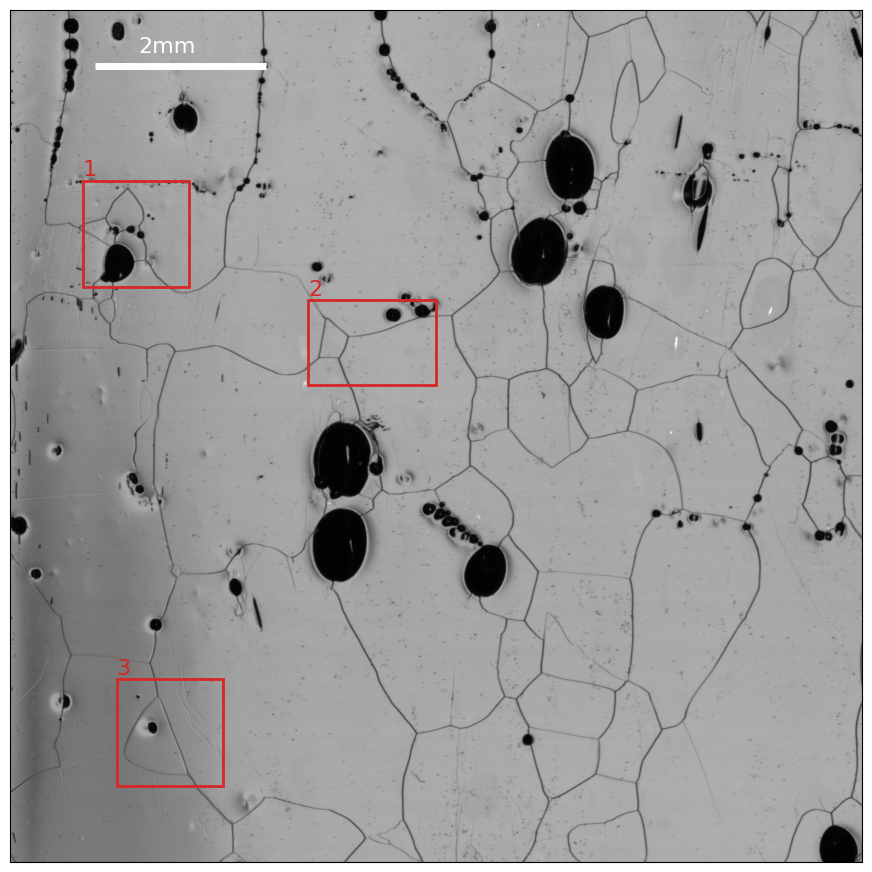

In [40]:
file_path = "/home/jovyan/work/PICE/ResearchGroups/Stratigraphy/Yannick 2022/Data_NEEM/xLASM_NEEM"
bag_list = ["nmx3653b_1.png","nmx3653c_1.png"]

for bag in bag_list:
    img = io.imread(os.path.join(file_path,bag))
    img = img[3000:5000,9000:11000]
    fig, ax = plt.subplots(1, 1,figsize=(16,9))
    ax.imshow(img,cmap="gray")
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    ax.hlines(y=130,xmin=200,xmax=600,lw=5,color="white")
    ax.text(300,100,"2mm",color="white")
    ax.text(250,1560,"3",color="tab:red")
    ax.add_patch( Rectangle((250, 1570),
                        250, 250,
                        fc ='none', 
                        ec ='tab:red',
                        lw = 2) )
    ax.text(170,390,"1",color="tab:red")
    ax.add_patch( Rectangle((170, 400),
                        250, 250,
                        fc ='none', 
                        ec ='tab:red',
                        lw = 2) )
    ax.text(700,670,"2",color="tab:red")
    ax.add_patch( Rectangle((700, 680),
                        300, 200,
                        fc ='none', 
                        ec ='tab:red',
                        lw = 2) )
    fig.tight_layout()
    fig.savefig("Plots/26_sublimation_{}".format(bag[3:-4]))
    fig.show()

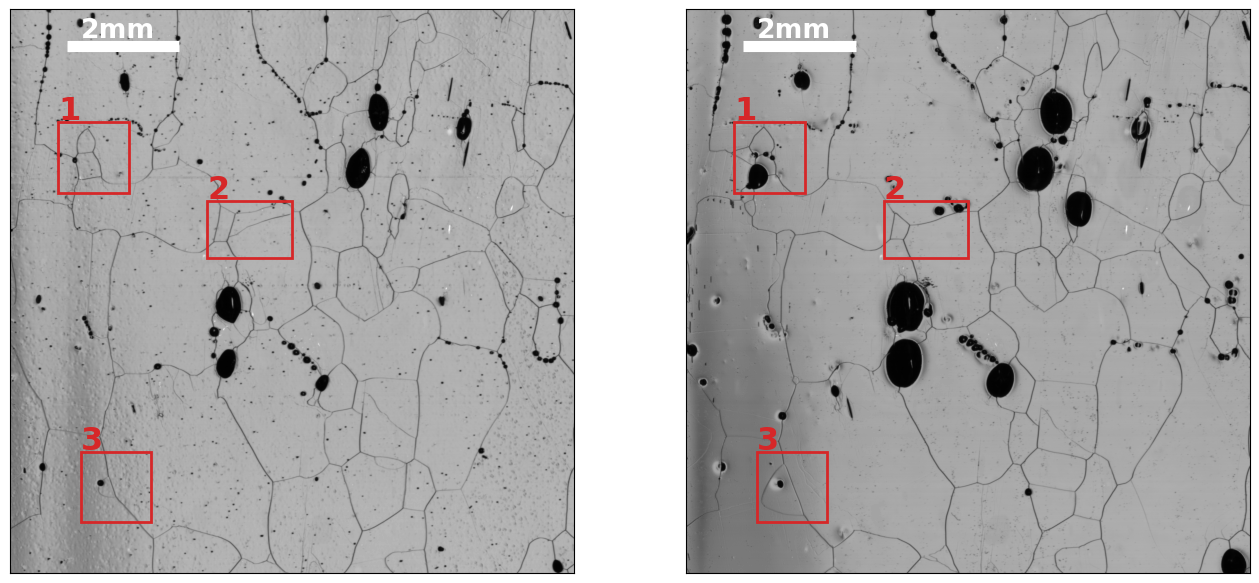

In [28]:
file_path = "/home/jovyan/work/PICE/ResearchGroups/Stratigraphy/Yannick 2022/Data_NEEM/xLASM_NEEM"
bag_list = ["nmx3653b_1.png","nmx3653c_1.png"]


fig, ax = plt.subplots(1, 2,figsize=(16,9))

for bag in bag_list[:1]:
    img = io.imread(os.path.join(file_path,bag))
    img = img[3000:5000,9000:11000]
    ax[0].imshow(img,cmap="gray")
    ax[0].set_xticks([], [])
    ax[0].set_yticks([], [])
    ax[0].hlines(y=130,xmin=200,xmax=600,lw=8,color="white")
    ax[0].text(250,100,"2mm",color="white",size="large",weight="bold")
    ax[0].text(250,1560,"3",color="tab:red",size="x-large",weight="bold")
    ax[0].add_patch( Rectangle((250, 1570),
                               250, 250,
                               fc ='none',
                               ec ='tab:red',
                               lw = 2) )
    ax[0].text(170,390,"1",color="tab:red",size="x-large",weight="bold")
    ax[0].add_patch( Rectangle((170, 400),
                               250, 250,fc ='none',
                               ec ='tab:red',
                               lw = 2) )
    ax[0].text(700,670,"2",color="tab:red",size="x-large",weight="bold")
    ax[0].add_patch( Rectangle((700, 680),
                                300, 200,
                                fc ='none', 
                                ec ='tab:red',
                                lw = 2) )

for bag in bag_list[1:2]:
    img = io.imread(os.path.join(file_path,bag))
    img = img[3000:5000,9000:11000]
    ax[1].imshow(img,cmap="gray")
    ax[1].set_xticks([], [])
    ax[1].set_yticks([], [])
    ax[1].hlines(y=130,xmin=200,xmax=600,lw=8,color="white")
    ax[1].text(250,100,"2mm",color="white",size="large",weight="bold")
    ax[1].text(250,1560,"3",color="tab:red",size="x-large",weight="bold")
    ax[1].add_patch( Rectangle((250, 1570),
                               250, 250,
                               fc ='none',
                               ec ='tab:red',
                               lw = 2) )
    ax[1].text(170,390,"1",color="tab:red",size="x-large",weight="bold")
    ax[1].add_patch( Rectangle((170, 400),
                               250, 250,fc ='none',
                               ec ='tab:red',
                               lw = 2) )
    ax[1].text(700,670,"2",color="tab:red",size="x-large",weight="bold")
    ax[1].add_patch( Rectangle((700, 680),
                                300, 200,
                                fc ='none', 
                                ec ='tab:red',
                                lw = 2) )

    
#fig.tight_layout()
fig.savefig("Plots/26_sublimation_all")
fig.show()